<a href="https://colab.research.google.com/github/karloxkronfeld/Races/blob/master/covidmundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm.auto import tqdm
for i in tqdm(range(10001)):
  print(" ", end='\r')

In [1]:
import pandas as pd
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML
from imageio import imread

In [12]:
covid=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid=covid.drop(covid.columns[[0,2,3]],axis=1)
covid=covid.groupby(covid.columns[0]).sum().T[-100:]

In [3]:
lista_paises=covid.columns
x=0
banderas=[]
drop_list=[]
while x<len(lista_paises):
  try:
    banderas.append(imread("https://github.com/karloxkronfeld/Banderas/blob/master/banderas/"+lista_paises[x]+".png?raw=true"))
    print(lista_paises[x])
    x+=1
  except:   
    
    try:
      banderas.append(imread("https://github.com/karloxkronfeld/Banderas/blob/master/banderas/"+lista_paises[x].replace(" ","-")+".png?raw=true"))      
      x+=1      
    except:
      drop_list.append(lista_paises[x])
      print(lista_paises[x]+"NO ESTA ", x)    
      x+=1 

Afghanistan
Albania
Algeria
Andorra
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and HerzegovinaNO ESTA  21
Botswana
Brazil
Brunei
Bulgaria
BurmaNO ESTA  27
Burundi
Cabo VerdeNO ESTA  29
Cambodia
Cameroon
Canada
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)NO ESTA  39
Congo (Kinshasa)NO ESTA  40
Croatia
Cuba
Cyprus
CzechiaNO ESTA  46
Denmark
Diamond PrincessNO ESTA  48
Djibouti
Dominica
Ecuador
Egypt
Eritrea
Estonia
EswatiniNO ESTA  58
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy SeeNO ESTA  75
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, SouthNO ESTA  91
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS ZaandamNO ESTA  104
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Maurita

In [13]:
covid=covid.drop(drop_list,axis=1)

In [14]:
covid

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
6/29/20               31238     2466    13571  ...   1128    1568       574
6/30/20               31517     2535    13907  ...   1158    1594       591
7/1/20                31836     2580    14272  ...   1190    1632       605
7/2/20                32022     2662    14657  ...   1221    1632       617
7/3/20                32324     2752    15070  ...   1240    1632       625
...                     ...      ...      ...  ...    ...     ...       ...
10/2/20               39290    13965    51847  ...   2040   14830      7858
10/3/20               39297    14117    51995  ...   2041   14974      7885
10/4/20               39341    14266    52136  ...   2041   15052      7888
10/5/20               39422    14410    52270  ...   2041   15089      7898
10/6/20               39486    14568    52399  ...   2047   15170      7915

[100 rows x 166 columns]

In [17]:
listas=[]
pasos=20
for i in range(len(covid)):
  listas.append(linspace(covid[i:i+1],covid[i+1:i+2],pasos)) 
apilar_listas=[]
for x in range(len(covid)-1):
  apilar_listas.append(pd.DataFrame(columns=covid.columns))
  for i in range(pasos):
    apilar_listas[x].loc[i]=listas[x][i][0]
  apilar_listas[x]["fecha"]=covid.index[x] 

In [18]:
datos=pd.concat(apilar_listas,ignore_index=True).set_index("fecha")
datos

Country/Region   Afghanistan       Albania  ...        Zambia     Zimbabwe
fecha                                       ...                           
6/29/20         31238.000000   2466.000000  ...   1568.000000   574.000000
6/29/20         31252.684211   2469.631579  ...   1569.368421   574.894737
6/29/20         31267.368421   2473.263158  ...   1570.736842   575.789474
6/29/20         31282.052632   2476.894737  ...   1572.105263   576.684211
6/29/20         31296.736842   2480.526316  ...   1573.473684   577.578947
...                      ...           ...  ...           ...          ...
10/5/20         39472.526316  14534.736842  ...  15152.947368  7911.421053
10/5/20         39475.894737  14543.052632  ...  15157.210526  7912.315789
10/5/20         39479.263158  14551.368421  ...  15161.473684  7913.210526
10/5/20         39482.631579  14559.684211  ...  15165.736842  7914.105263
10/5/20         39486.000000  14568.000000  ...  15170.000000  7915.000000

[1980 rows x 166 columns]

In [19]:
dic_banderas={covid.columns[i]:i for i in range(len(covid.columns))}
# imshow(banderas[dic_banderas["Colombia"]])

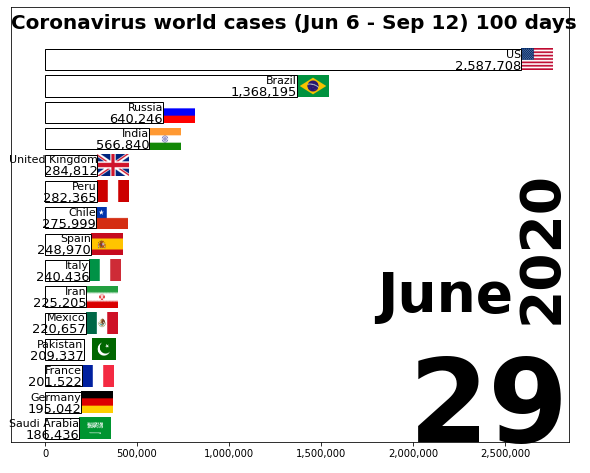

In [20]:
def race_mundial(numero):
  funcion=datos.iloc[numero].sort_values()[-15:]
  pais=funcion.index
  casos=funcion.values
  year=funcion.name
  ax.clear()
  ax.barh(pais,casos,color="w",edgecolor="k")
  yticks([])

  
  ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
  locator_params(axis="x",nbins=10)

 
  ax.text(0, 0.95, "Coronavirus world cases (Jun 6 - Sep 12) 100 days ",transform=ax.transAxes, size=20, weight=600, ha='left',color="k")
  ax.text(x=0.9, y=0.3,s="{}".format(pd.to_datetime(year).strftime("%B")),transform=ax.transAxes,size=55,ha='right',weight=700,c="k")
  ax.text(x=1, y=0,s="{}".format(pd.to_datetime(year).strftime("%d")),transform=ax.transAxes,size=115,ha='right',weight=700,c="k")      
  ax.text(x=1, y=0.3,s="{}".format(pd.to_datetime(year).strftime("%Y")),transform=ax.transAxes,size=55,ha='right',weight=700,rotation=90,c="k")

  for i in range(len(funcion)):
    if [funcion.index=="Colombia"][0][i]:
      if 1<i<2:
        ax.text(casos[i],i,"        Abran ya eso!",size=15)
      if 3<i<5:
        ax.text(casos[i],i,"         Oing Oing!",size=15)
      if i>5:
        ax.text(casos[i],i,"         VAMOS COLOMBIA!",size=15)

 
  flag=[]
  for i in range(len(pais)):
    flag.append(banderas[dic_banderas[funcion.index[i]]])

  for i,(casos,bandera,pais) in enumerate(zip(casos,flag,pais)):
    ax.text(casos,i,f'{casos:,.0f}',va="top",ha="right",size=13)  
    ax.text(casos,i,pais,va="bottom",ha="right",size=11)  

   
    derecha=casos+max(funcion.values)/15
    arriba=-0.41+i
    abajo=arriba+0.8    
    ax.imshow(bandera,extent=[casos,derecha,arriba,abajo],aspect="auto") 
    ax.set_visible(True) 
    xlim(-min(funcion.values),max(funcion.values)*1.1)
    ylim(-0.5,16)

fig_race,ax=subplots(figsize=(10,8))
# race_mundial(-100)
frames=range(len(datos.index))
mi_anim=animation.FuncAnimation(fig_race,race_mundial,frames,interval=55)
rc("animation",ffmpeg_path="/usr/bin/ffmpeg")
HTML(mi_anim.to_html5_video())
  


In [ ]:
funcion=datos.iloc[100].sort_values()[-15:]

NameError: ignored

estoy en el numero 3


[False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]